# Linear Regression

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/Internships/Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


### Removing the unnamed: 0 column since it's useless

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [4]:
# Reshape into a 2D array
x = df[['YearsExperience']]
y = df['Salary']

### Splitting the dataset

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [7]:
# Prediction using the linear regression model
y_pred = lr.predict(x_test)

### Predictions

In [8]:
# prediction of salary for 5 years of experience
years_experience = np.array([[5]]) 

predicted_salary = lr.predict(years_experience)

predicted_salary_value = float(predicted_salary[0])

print(f"The predicted salary for {years_experience[0][0]} years of experience is: ${predicted_salary_value:.2f}")

The predicted salary for 5 years of experience is: $71499.28


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# prediction of salary for 11 years of experience
years_experience = np.array([[11]]) 

predicted_salary = lr.predict(years_experience)

predicted_salary_value = float(predicted_salary[0])

print(f"The predicted salary for {years_experience[0][0]} years of experience is: ${predicted_salary_value:.2f}")

The predicted salary for 11 years of experience is: $128042.17


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# prediction of salary for 3 years of experience
years_experience = np.array([[3]]) 

predicted_salary = lr.predict(years_experience)

predicted_salary_value = float(predicted_salary[0])

print(f"The predicted salary for {years_experience[0][0]} years of experience is: ${predicted_salary_value:.2f}")

The predicted salary for 3 years of experience is: $52651.65


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Accuracies

In [11]:
print('Train accuracy ',lr.score(x_train, y_train ))
print('Test accuracy ',lr.score(x_test, y_test ))

Train accuracy  0.9645401573418148
Test accuracy  0.9024461774180498


### Train Set Visualization

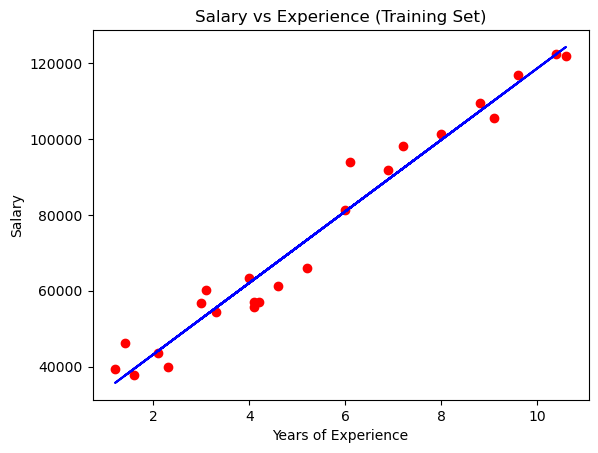

In [12]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Test Set Visualization

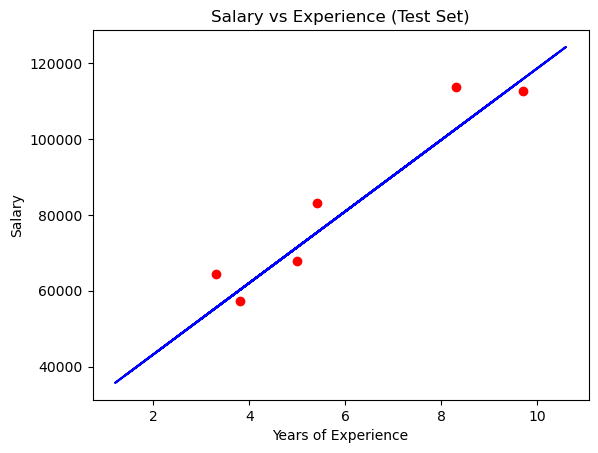

In [13]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Polynomial Regression

In [15]:
df1 = pd.read_csv("C:/Users/DELL/Desktop/Internships/rank_salary.csv")
df1

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [16]:
x = df1[["Level"]]
y = df1["Salary"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
model = LinearRegression()

### 2 Degree Polynomial

In [19]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [20]:
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

In [21]:
print("PolynomialRegression Train accuracy: ", model.score(x_train_poly, y_train))
print("PolynomialRegression Test accuracy: ", model.score(x_test_poly, y_test))

PolynomialRegression Train accuracy:  0.9280776280497959
PolynomialRegression Test accuracy:  0.7666492889299867


### 3 Degree Polynomial

In [22]:
poly = PolynomialFeatures(degree = 3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [23]:
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

In [24]:
print("PolynomialRegression Train accuracy: ", model.score(x_train_poly, y_train))
print("PolynomialRegression Test accuracy: ", model.score(x_test_poly, y_test))

PolynomialRegression Train accuracy:  0.9913280453724184
PolynomialRegression Test accuracy:  0.8762695647830209


### 4 Degree Polynomial

In [25]:
poly = PolynomialFeatures(degree = 4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [26]:
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

In [27]:
print("PolynomialRegression Train accuracy: ", model.score(x_train_poly, y_train))
print("PolynomialRegression Test accuracy: ", model.score(x_test_poly, y_test))

PolynomialRegression Train accuracy:  0.9995857211026754
PolynomialRegression Test accuracy:  0.9714666803841844


### Predictions

In [28]:
x_new = np.array([[6]])
x_new_poly = poly.transform(x_new)  

y_new_pred = model.predict(x_new_poly)
print(f"Prediction for x_new = {x_new[0][0]}: {y_new_pred[0]}")

Prediction for x_new = 6: 143604.42937539495


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [29]:
x_new = np.array([[3]])
x_new_poly = poly.transform(x_new)  

y_new_pred = model.predict(x_new_poly)
print(f"Prediction for x_new = {x_new[0][0]}: {y_new_pred[0]}")

Prediction for x_new = 3: 52614.08306219627


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [30]:
x_new = np.array([[8]])
x_new_poly = poly.transform(x_new)  

y_new_pred = model.predict(x_new_poly)
print(f"Prediction for x_new = {x_new[0][0]}: {y_new_pred[0]}")

Prediction for x_new = 8: 307266.9951619054


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# Multiple Regression

In [31]:
df2 = pd.read_csv("C:/Users/DELL/Desktop/Internships/multiple_linear_regression_dataset.csv")
df2

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [32]:
x = df2[["age","experience"]]
y = df2["income"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [34]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(x_test)
y_pred

array([31093.38107376, 31295.49954076, 40250.46080162, 34897.6958918 ])

In [36]:
print("LinearRegression Train accuracy: ", regressor.score(x_train, y_train))
print("LinearRegression Test accuracy: ", regressor.score(x_test, y_test))

LinearRegression Train accuracy:  0.9741213876189155
LinearRegression Test accuracy:  0.9387098237077887


### Predictions

In [37]:
p = regressor.predict([[47, 2]])
p

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31024.88342951])

In [38]:
p = regressor.predict([[20, 4]])
p

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38063.09371958])

In [39]:
p = regressor.predict([[25, 7]])
p

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44022.2140304])